In [2]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

from matplotlib.pyplot import cm

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [3]:
############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau_awas_replace/utbl_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau_awas_replace/mustar_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau_awas_replace/tau_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau_awas_replace/t_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau_awas_replace/gf_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau_awas_replace/segment_info_campavgbl_tropotau_twp_awas_replace.pkl')
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau_awas_replace/trcnames_allseg_twp_trtau.pkl")

In [4]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_info['r squared'].values >= 0.65))

seg_info_screened = seg_info.iloc[high_r2_idx]

# screen vars 
mustar_allseg_screened = mustar_allseg[high_r2_idx]
utbl_allseg_screened = utbl_allseg[high_r2_idx]
tau_allseg_screened = tau_allseg[high_r2_idx]
trcnames_allseg_screened = trcnames_allseg[high_r2_idx]

gf_allseg_screened = gf_allseg[high_r2_idx]
t_allseg_screened = t_allseg[high_r2_idx]

In [5]:
### GET INDEX FOR EACH TRACER IN COLUMN (NOT SAME FOR EVERY COLUMN)
# tracer names, full list 
names = trcnames_allseg[8].values

fill = np.empty(len(seg_info_screened))
fill[:] = np.nan

# thing to fill with index of each tracer in every column 
trc_idx = pd.DataFrame()
for nn in names:
    trc_idx[nn] = pd.Series(fill)
    
# loop through, get index location for every tracer 
col = list(trcnames_allseg_screened)
for nn in names:
    nnidx = []
    for i in col:
        idx = np.argwhere(trcnames_allseg_screened[i].values == nn)
        if (len(idx) > 0):
            nnidx.append(np.ndarray.item(idx))
        else: 
            nnidx.append(np.nan)
    trc_idx[nn] = nnidx 

In [6]:
###########################################################################################
###########################################################################################
###########################################################################################
# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [7]:
####################################################################################
# SHORTEST ------------------------------------------------------------------------
####################################################################################
# choose shortest segments
ascend_mode = seg_info_screened.sort_values('mode age')
short10 = ascend_mode[:10]
#short10 = short10.reset_index()
#short10 = short10.drop(short10.columns[0], axis=1)

short10_idx = short10.index
short10

,Time_UTC,Flight,r squared,mean age,mode age
30,2014-01-29 00:53:09,RF07,0.791765,3.116098,0.86592
29,2014-01-29 00:49:20,RF07,0.738761,2.953748,0.86592
28,2014-01-29 00:38:42,RF07,0.679493,2.835295,0.86592
22,2014-01-25 01:14:11,RF06,0.664692,2.871305,0.86592
21,2014-01-25 01:06:11,RF06,0.729932,3.815232,1.11592
37,2014-01-29 03:49:44,RF07,0.801545,3.933366,1.11592
14,2014-01-22 04:33:40,RF05,0.735181,6.081827,1.61592
39,2014-01-29 04:04:41,RF07,0.718046,5.925000,1.61592
135,2014-02-19 19:48:48,RF13,0.774827,7.513235,1.86592
136,2014-02-19 19:54:49,RF13,0.800956,7.184492,1.86592


30
29
28


(0, 1.5)

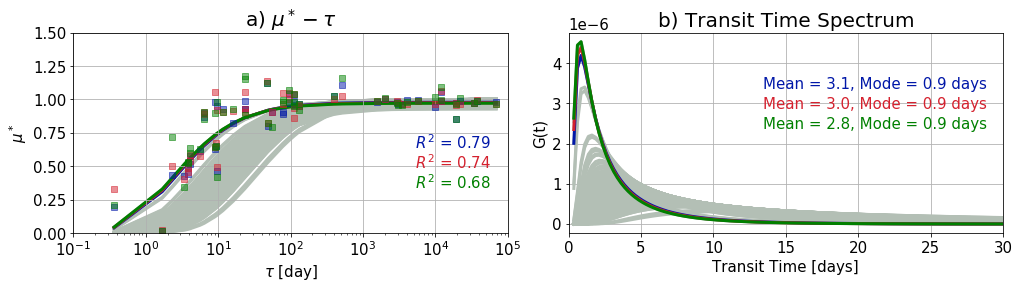

In [8]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)

# add extremes with scatter and r^2 
############################################################
#from matplotlib.pyplot import cm
#color=cm.rainbow(np.linspace(0,1,10))
color =[[0, 0.09, 0.66, 1.0], [0.83, 0.13, 0.18, 1.0], 
        [0.0, 0.5, 0.0, 1.0]] 

strings = ['RF07 00:53:09', 'RF07  00:49:20', 'RF07  00:38:42']
thisplot = short10.iloc[[0, 1, 2], :]

for p, i in enumerate(thisplot.index): 
    print(i)
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = short10['r squared'].loc[i]
    mean_age = short10['mean age'].loc[i]
    mode_age = short10['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[p]
    add_r2 = 1
    add_meanmode = 1
    add_scatter = 1
    #plot 
    overplot = 1+p
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
    #txt = strings[p]
    #if (p < 3):
    #    plt.text(5+(p*6), 4e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    #elif ((p > 2) & (p < 7)):
    #    plt.text(5+((p-3)*6), 3e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    #else:
    #    plt.text(5+((p-7)*6), 2e-6, txt, color = my_color, fontsize = 15, weight = 'bold')

    
# add grid
ax0, ax1 = my_ax
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [9]:
####################################################################################
# LONGEST ------------------------------------------------------------------------
####################################################################################
# choose shortest segments
ascend_mode = seg_info_screened.sort_values('mode age')
long10 = ascend_mode[-10:]
#short10 = short10.reset_index()
#short10 = short10.drop(short10.columns[0], axis=1)

long10_idx = long10.index
long10

,Time_UTC,Flight,r squared,mean age,mode age
110,2014-02-17 04:07:53,RF12,0.895672,26.125842,6.865920
164,2014-02-25 00:06:52,RF15,0.916029,26.725507,7.062606
160,2014-02-22 01:42:44,RF14,0.931159,27.369929,7.115920
125,2014-02-19 18:48:47,RF13,0.916556,27.369929,7.115920
153,2014-02-22 00:37:11,RF14,0.932566,28.037489,7.365920
109,2014-02-17 04:05:43,RF12,0.919769,28.738426,7.615920
158,2014-02-22 01:24:44,RF14,0.926881,31.068569,8.115920
165,2014-02-25 00:21:51,RF15,0.943642,31.068270,8.189426
85,2014-02-13 05:57:37,RF11,0.885940,38.317901,10.115920
84,2014-02-13 05:26:12,RF11,0.852064,42.575446,11.115920


125


(0, 1.5)

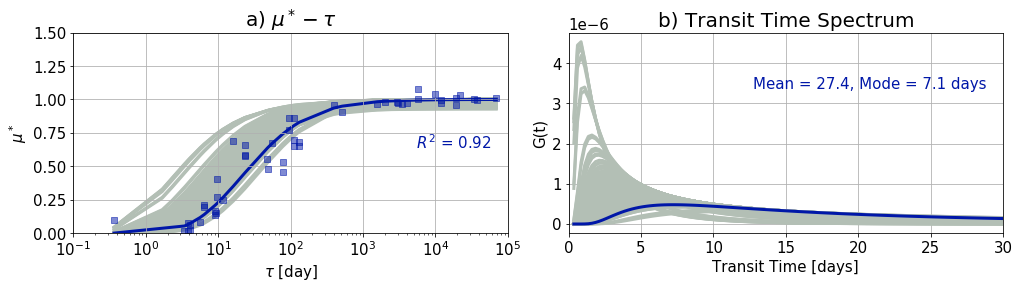

In [10]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)

# add extremes with scatter and r^2 
############################################################
#from matplotlib.pyplot import cm
#color=cm.rainbow(np.linspace(0,1,10))
color =[[0, 0.09, 0.66, 1.0], [0.83, 0.13, 0.18, 1.0], 
        [0.0, 0.5, 0.0, 1.0]]

strings = ['RF13 18:48:47']
thisplot = long10.iloc[[3], :]

for p, i in enumerate(thisplot.index): 
    print(i)
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = long10['r squared'].loc[i]
    mean_age = long10['mean age'].loc[i]
    mode_age = long10['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[p]
    add_r2 = 1
    add_meanmode = 1
    add_scatter = 1
    #plot 
    overplot = 1+p
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
    #txt = strings[p]
    #if (p < 3):
    #    plt.text(5+(p*6), 4e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    #elif ((p > 2) & (p < 7)):
    #    plt.text(5+((p-3)*6), 3e-6, txt, color = my_color, fontsize = 15, weight = 'bold')
    #else:
    #    plt.text(5+((p-7)*6), 2e-6, txt, color = my_color, fontsize = 15, weight = 'bold')

    
# add grid
ax0, ax1 = my_ax
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [11]:
########################################################################################
# CONDENSED VERSION 
########################################################################################

30
29
28
125


(0, 1.5)

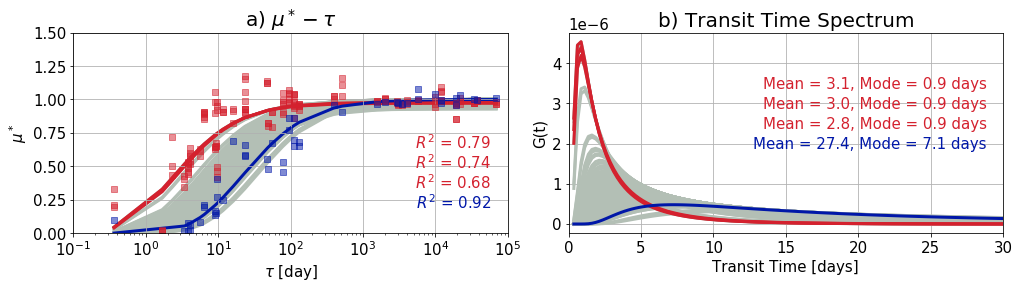

In [19]:
########################################################################################
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)

#### ADD SHORT 
# add extremes with scatter and r^2 
############################################################
#from matplotlib.pyplot import cm
#color=cm.rainbow(np.linspace(0,1,10))
color =[[0, 0.09, 0.66, 1.0], [0.83, 0.13, 0.18, 1.0], 
        [0.0, 0.5, 0.0, 1.0]] 

strings = ['RF07 00:53:09', 'RF07  00:49:20', 'RF07  00:38:42']
thisplot = short10.iloc[[0, 1, 2], :]

for p, i in enumerate(thisplot.index): 
    print(i)
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = short10['r squared'].loc[i]
    mean_age = short10['mean age'].loc[i]
    mode_age = short10['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    #my_color = color[p]
    my_color = color[1]
    add_r2 = 1
    add_meanmode = 1
    add_scatter = 1
    #plot 
    overplot = 1+p
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)

#### ADD LONG 
strings = ['RF13 18:48:47']
thisplot = long10.iloc[[3], :]

for p, i in enumerate(thisplot.index): 
    print(i)
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = long10['r squared'].loc[i]
    mean_age = long10['mean age'].loc[i]
    mode_age = long10['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    #my_color = color[p]
    my_color = color[0]
    add_r2 = 1
    add_meanmode = 1
    add_scatter = 1
    #plot 
    #overplot = 1+p
    overplot = 4
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
    
### GRID  
# add grid
ax0, ax1 = my_ax
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])

